In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train_BlackFriday.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.describe().round(2)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.00,550068.00,550068.00,550068.00,376430.00,166821.00,550068.00
mean,1003028.84,8.08,0.41,5.40,9.84,12.67,9263.97
std,1727.59,6.52,0.49,3.94,5.09,4.13,5023.07
min,1000001.00,0.00,0.00,1.00,2.00,3.00,12.00
25%,1001516.00,2.00,0.00,1.00,5.00,9.00,5823.00
50%,1003077.00,7.00,0.00,5.00,9.00,14.00,8047.00
75%,1004478.00,14.00,1.00,8.00,15.00,16.00,12054.00
max,1006040.00,20.00,1.00,20.00,18.00,18.00,23961.00


In [5]:
df.drop(['User_ID'], axis = 1, inplace = True)


In [6]:
df.nunique()

Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [7]:
df['Gender'] = df['Gender'].map({'F': 0, 'M' : 1})


In [8]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
df['Age'] = df['Age'].map({'0-17': 0, '18-25' : 1,'26-35':2,'35-45':3,'46-50':4,'51-55':5,'55+':6})


In [10]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0.0,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0.0,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0.0,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0.0,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,6.0,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5.0,13,B,1,1,20,NaN,NaN,368
550064,P00375436,0,2.0,1,C,3,0,20,NaN,NaN,371
550065,P00375436,0,2.0,15,B,4+,1,20,NaN,NaN,137
550066,P00375436,0,6.0,1,C,2,0,20,NaN,NaN,365


In [11]:
df['City_Category'].unique()


array(['A', 'C', 'B'], dtype=object)

In [12]:
df['City_Category'] = df['City_Category'].map({'A': 0, 'B' : 1,'C':2})

In [13]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0.0,10,0,2,0,3,NaN,NaN,8370
1,P00248942,0,0.0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,0.0,10,0,2,0,12,NaN,NaN,1422
3,P00085442,0,0.0,10,0,2,0,12,14.0,NaN,1057
4,P00285442,1,6.0,16,2,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5.0,13,1,1,1,20,NaN,NaN,368
550064,P00375436,0,2.0,1,2,3,0,20,NaN,NaN,371
550065,P00375436,0,2.0,15,1,4+,1,20,NaN,NaN,137
550066,P00375436,0,6.0,1,2,2,0,20,NaN,NaN,365


In [14]:
df.drop(['Product_ID'], axis = 1, inplace = True)


In [15]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0.0,10,0,2,0,3,NaN,NaN,8370
1,0,0.0,10,0,2,0,1,6.0,14.0,15200
2,0,0.0,10,0,2,0,12,NaN,NaN,1422
3,0,0.0,10,0,2,0,12,14.0,NaN,1057
4,1,6.0,16,2,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5.0,13,1,1,1,20,NaN,NaN,368
550064,0,2.0,1,2,3,0,20,NaN,NaN,371
550065,0,2.0,15,1,4+,1,20,NaN,NaN,137
550066,0,6.0,1,2,2,0,20,NaN,NaN,365


In [16]:
df['Product_Category_2'].unique()


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [17]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])


In [18]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])


In [19]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0.0,10,0,2,0,3,8.0,16.0,8370
1,0,0.0,10,0,2,0,1,6.0,14.0,15200
2,0,0.0,10,0,2,0,12,8.0,16.0,1422
3,0,0.0,10,0,2,0,12,14.0,16.0,1057
4,1,6.0,16,2,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5.0,13,1,1,1,20,8.0,16.0,368
550064,0,2.0,1,2,3,0,20,8.0,16.0,371
550065,0,2.0,15,1,4+,1,20,8.0,16.0,137
550066,0,6.0,1,2,2,0,20,8.0,16.0,365


In [20]:
df.isnull().sum()


Gender                             0
Age                           110013
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                           0
dtype: int64

In [21]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [22]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0.0,10,0,2,0,3,8.0,16.0,8370
1,0,0.0,10,0,2,0,1,6.0,14.0,15200
2,0,0.0,10,0,2,0,12,8.0,16.0,1422
3,0,0.0,10,0,2,0,12,14.0,16.0,1057
4,1,6.0,16,2,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5.0,13,1,1,1,20,8.0,16.0,368
550064,0,2.0,1,2,3,0,20,8.0,16.0,371
550065,0,2.0,15,1,4+,1,20,8.0,16.0,137
550066,0,6.0,1,2,2,0,20,8.0,16.0,365


In [23]:
df.isnull().sum()


Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [24]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


In [25]:
df.sample(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
23951,1,1.0,5,1,2,0,1,2.0,15.0,15918
92467,1,2.0,0,1,4,1,5,8.0,16.0,5308
240872,0,2.0,20,0,1,0,5,8.0,16.0,1918
221755,1,5.0,17,1,3,1,1,4.0,16.0,11519
132316,1,4.0,17,2,4,1,1,2.0,15.0,19115
8182,0,1.0,20,1,0,1,5,8.0,16.0,6881
181464,1,2.0,1,2,4,1,8,12.0,17.0,10070
184779,0,2.0,6,1,4,0,1,2.0,6.0,7949
489500,1,2.0,14,1,1,0,8,8.0,16.0,9834
273218,0,4.0,1,2,0,1,5,12.0,14.0,5339


In [26]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [27]:
df['Age'] = df['Age'].astype(int)

In [28]:
df['Product_Category_2'] = df['Product_Category_2'].astype(int)

In [29]:
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

In [30]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,8,16,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,8,16,1422
3,0,0,10,0,2,0,12,14,16,1057
4,1,6,16,2,4,0,8,8,16,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,8,16,368
550064,0,2,1,2,3,0,20,8,16,371
550065,0,2,15,1,4,1,20,8,16,137
550066,0,6,1,2,2,0,20,8,16,365


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int32
 2   Occupation                  550068 non-null  int64
 3   City_Category               550068 non-null  int64
 4   Stay_In_Current_City_Years  550068 non-null  int32
 5   Marital_Status              550068 non-null  int64
 6   Product_Category_1          550068 non-null  int64
 7   Product_Category_2          550068 non-null  int32
 8   Product_Category_3          550068 non-null  int32
 9   Purchase                    550068 non-null  int64
dtypes: int32(4), int64(6)
memory usage: 33.6 MB


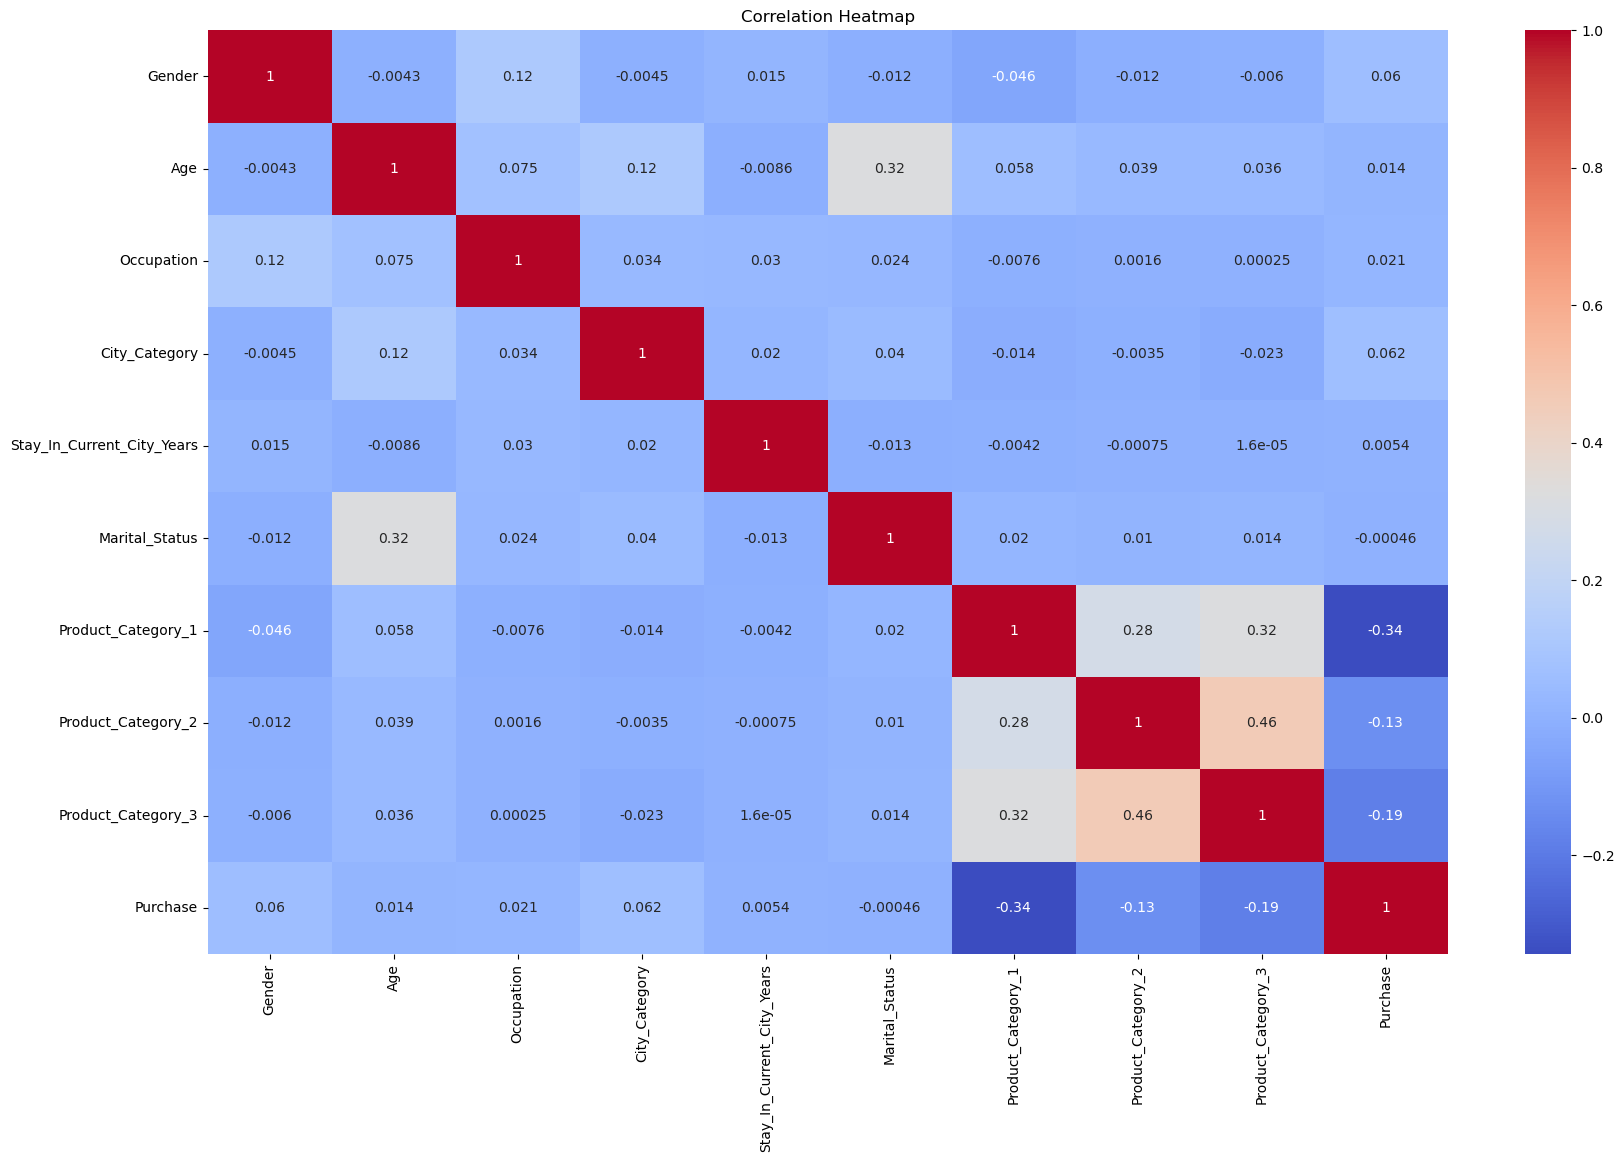

In [32]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

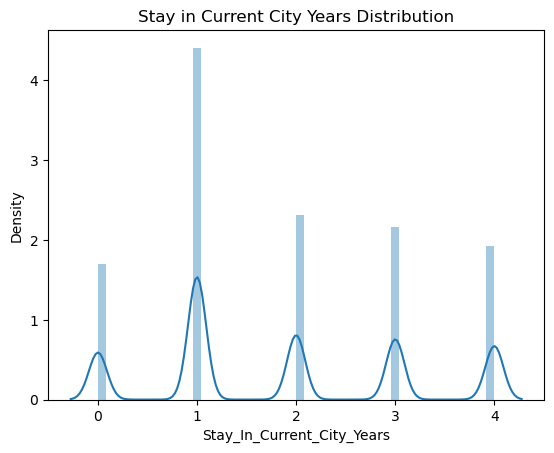

In [33]:
sns.distplot(df["Stay_In_Current_City_Years"])
plt.title("Stay in Current City Years Distribution")
plt.show()

<Axes: xlabel='Purchase', ylabel='Density'>

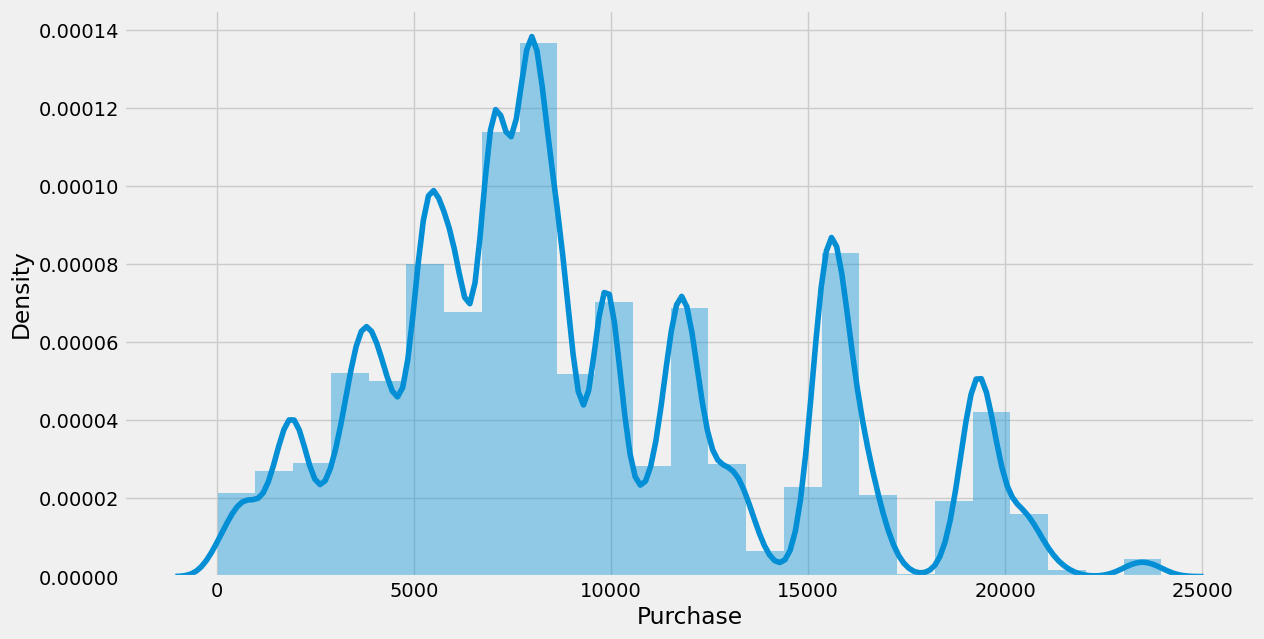

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['Purchase'], bins=25)

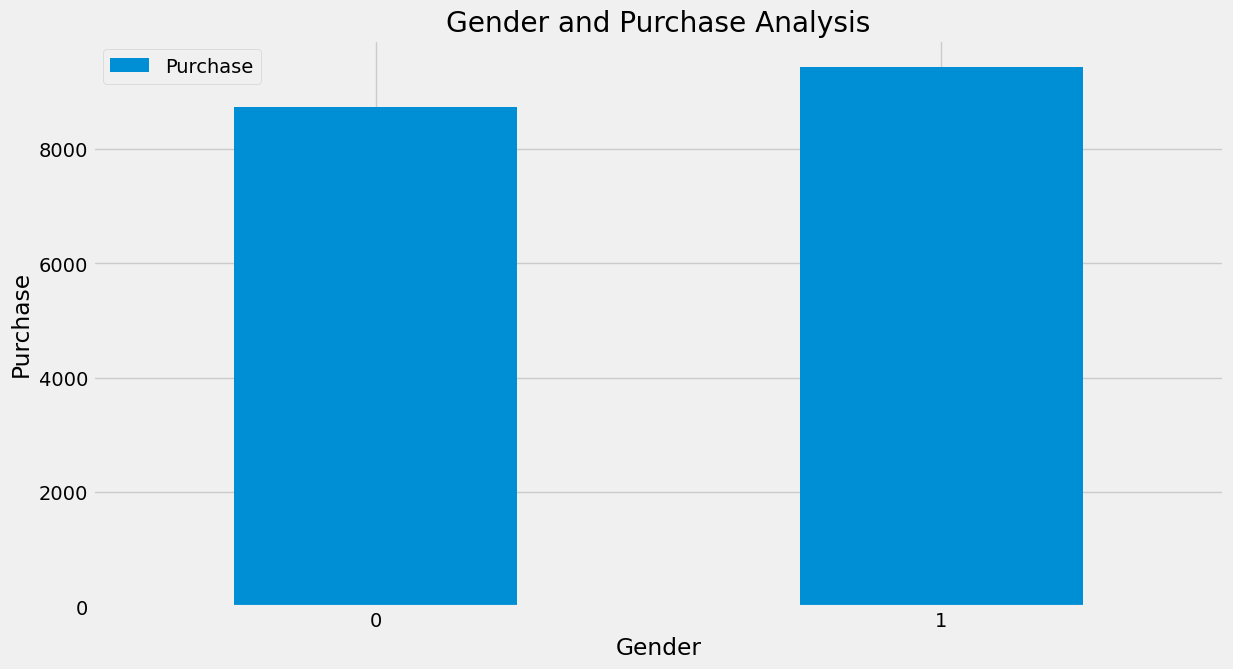

In [35]:

gender_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Product_Category_1'>

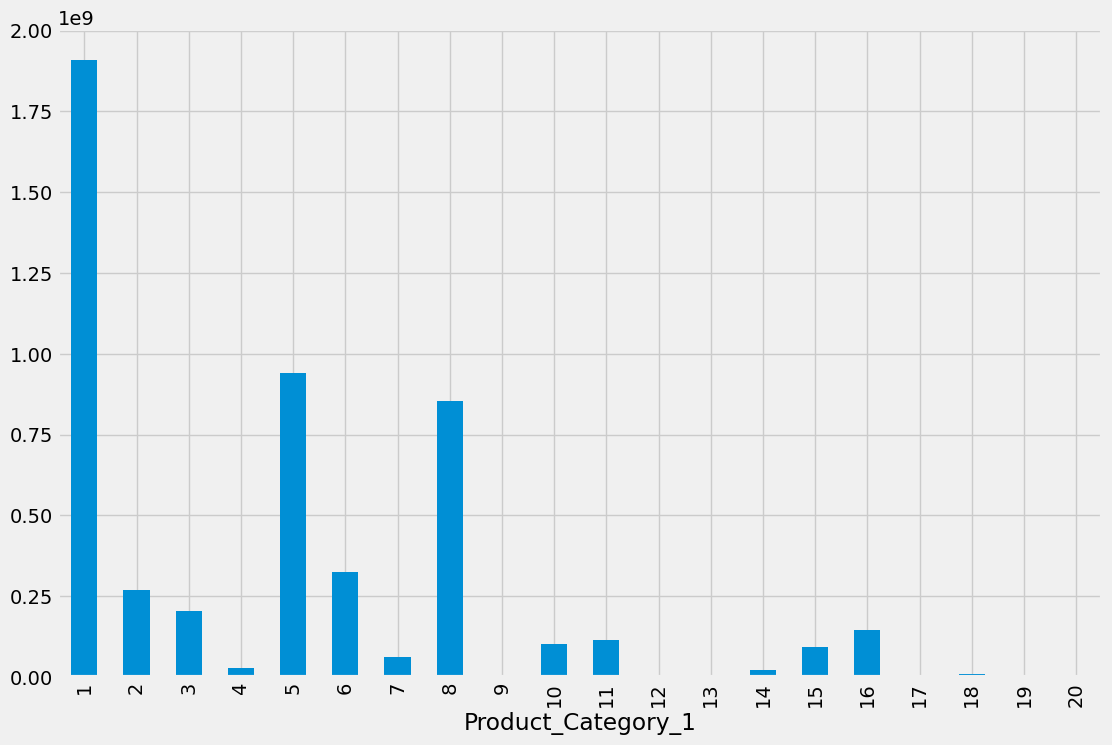

In [36]:
df.groupby('Product_Category_1')['Purchase'].sum().plot(kind='bar',figsize=(12,8))


<Axes: xlabel='Product_Category_2'>

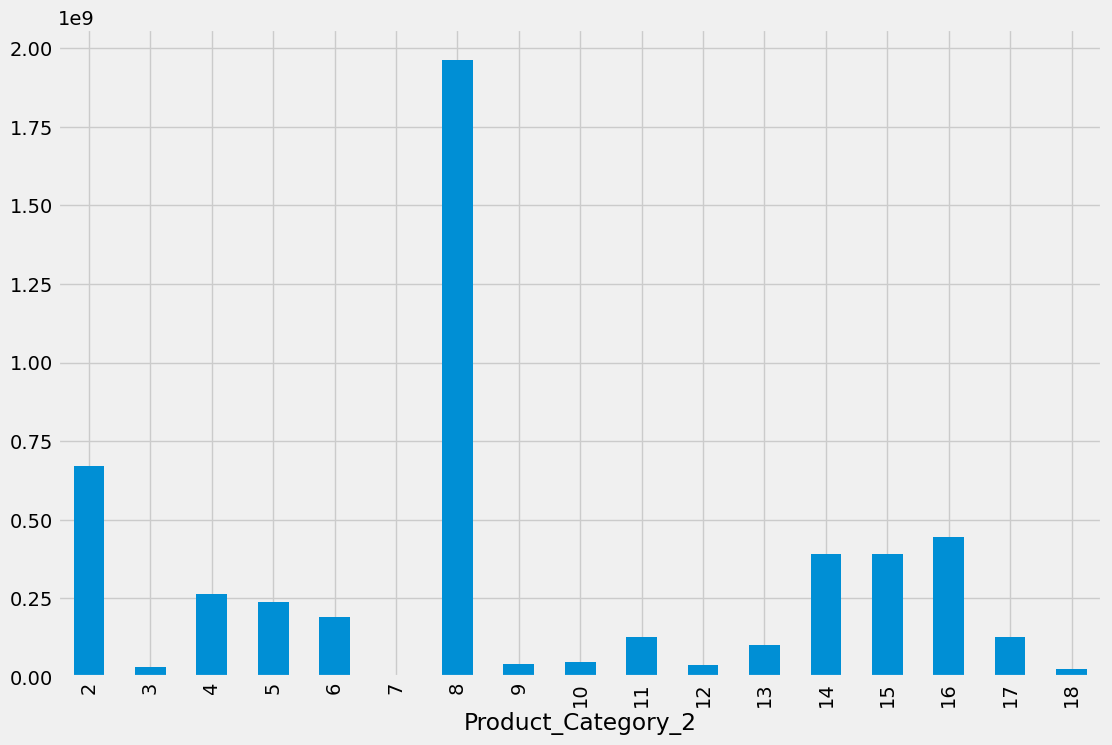

In [37]:
df.groupby('Product_Category_2')['Purchase'].sum().plot(kind='bar',figsize=(12,8))


<Axes: xlabel='Product_Category_3'>

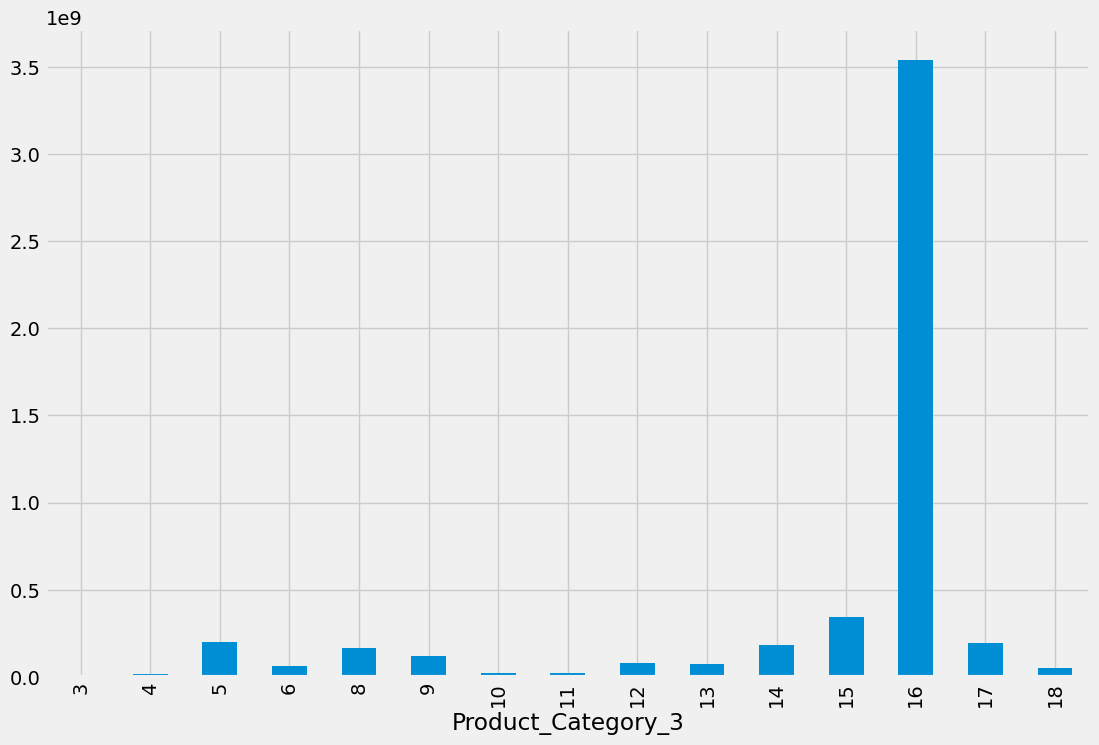

In [38]:
df.groupby('Product_Category_3')['Purchase'].sum().plot(kind='bar',figsize=(12,8))


In [39]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,8,16,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,8,16,1422
3,0,0,10,0,2,0,12,14,16,1057
4,1,6,16,2,4,0,8,8,16,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,8,16,368
550064,0,2,1,2,3,0,20,8,16,371
550065,0,2,15,1,4,1,20,8,16,137
550066,0,6,1,2,2,0,20,8,16,365


In [40]:
y = df['Purchase'] 
X = df.drop(['Purchase'],axis=1)
print(X.shape)
print(y.shape)

(550068, 9)
(550068,)


In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=101)

In [42]:
X_train.shape

(440054, 9)

In [43]:
X_test.shape

(110014, 9)

In [44]:
sc = StandardScaler()
sc.fit_transform(X_train)

array([[ 0.57253078, -0.22060038, -1.23883412, ..., -1.11908088,
        -1.69108745, -2.18585851],
       [-1.746631  ,  1.27535186, -1.08555176, ...,  0.65804121,
        -0.29311687,  0.3692529 ],
       [ 0.57253078, -0.22060038,  1.21368357, ...,  0.65804121,
         0.87185862,  0.00423698],
       ...,
       [-1.746631  , -0.22060038, -0.16585763, ...,  0.65804121,
         1.33784881,  0.3692529 ],
       [ 0.57253078, -0.22060038,  1.06040121, ...,  0.15029204,
        -0.29311687, -0.36077893],
       [ 0.57253078, -0.22060038, -1.08555176, ...,  2.68903788,
        -0.29311687,  0.3692529 ]])

In [45]:
sc.fit_transform(X_test)


array([[ 0.57272498, -0.22512453, -0.31535789, ...,  0.66511126,
         1.79616633,  0.36695146],
       [-1.74603873,  2.00800092, -0.31535789, ...,  0.66511126,
         1.09892534,  0.36695146],
       [ 0.57272498,  2.75237607,  0.75865802, ...,  1.42940877,
         1.56375266,  0.36695146],
       ...,
       [ 0.57272498, -0.22512453, -1.23594295, ...,  0.66511126,
        -0.29555665,  0.36695146],
       [ 0.57272498,  2.00800092, -1.23594295, ..., -0.09918624,
         1.09892534,  0.36695146],
       [-1.74603873,  2.00800092, -0.16192704, ...,  0.66511126,
         1.09892534,  0.36695146]])

In [46]:
lm=LinearRegression()
lm.fit(X_train, y_train)
w=lm.coef_
b=lm.intercept_
print(w)
print(b)

[ 524.84035275  113.81633635    7.0799316   343.18200818   14.03896331
  -33.32650998 -401.89080381   -2.52320091 -155.63897588]
12703.676844626701


In [47]:
predictions=lm.predict(X_test)
predictions

array([8149.72286106, 8255.67869166, 7733.17608869, ..., 7758.69214486,
       9929.67290293, 8282.04616992])

In [48]:
RF = RandomForestRegressor(n_estimators=10,max_depth=7,n_jobs=-1,random_state=42)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=10, n_jobs=-1, random_state=42)

In [49]:
y_pred = RF.predict(X_test)
y_pred

array([7916.69287295, 7460.77795096, 4828.44481796, ..., 7460.77795096,
       6446.92469462, 7460.77795096])

In [50]:
y_test

24033      5970
301904     6060
44698      4615
53213      8654
353008     9907
          ...  
49945      1723
355438    10634
199602     7772
423504     6962
199365     8093
Name: Purchase, Length: 110014, dtype: int64

In [51]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

2251.7295643036487

In [52]:
r2_score(y_test, y_pred)

0.6457521652667443

In [53]:
print(mean_squared_error(y_test, y_pred))

8936003.010271017


In [54]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

2989.3148061505694


In [55]:
y.mean()

9263.968712959126

In [56]:
y_test.mean()

9287.85901794317

In [57]:
pip install xgboost


In [57]:
xgb_reg=XGBRegressor(n_estimators=480, learning_rate=0.2, max_depth=8)

In [58]:
xgb_reg.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=480, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
xgb_y_pred=xgb_reg.predict(X_test)

In [60]:
print("RMSE:",np.sqrt(mean_squared_error(y_test, xgb_y_pred)))
print("y_mean",(y.mean()))
print("R2 Score:",round(r2_score(y_test,xgb_y_pred)*100,2))

RMSE: 2889.6578583824735
y_mean 9263.968712959126
R2 Score: 66.9
